In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
house=pd.read_csv('kc_house_data_small.csv')

In [3]:
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,7,1640,0,1966,0,98058,47.4550,-122.182,1340,8346
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,7,1110,510,1950,0,98112,47.6393,-122.308,2100,6500
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,8,1670,0,1912,0,98112,47.6350,-122.284,2100,5400
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,8,1870,0,1990,0,98055,47.4314,-122.204,2020,8912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
2609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
2610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
2611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
#1
house['unit_price']=house['price']/house['sqft_living']

In [5]:
house.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,unit_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,1640,0,1966,0,98058,47.4550,-122.182,1340,8346,140.243902
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,1110,510,1950,0,98112,47.6393,-122.308,2100,6500,419.753086
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,1670,0,1912,0,98112,47.6350,-122.284,2100,5400,589.820359
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,1870,0,1990,0,98055,47.4314,-122.204,2020,8912,200.534759


In [6]:
#2
new_df=house[['zipcode','price','sqft_living']].groupby(['zipcode']).mean()
new_df['Price_zipcode']=new_df['price']/new_df['sqft_living']
new_df=new_df.drop(columns=['price'])
new_df=new_df.drop(columns=['sqft_living'])


In [7]:
new_df

,Price_zipcode
zipcode,
98001,154.922241
98002,145.516987
98003,154.714019
98004,472.824953
98005,289.458675
...,...
98177,286.383521
98178,174.452338
98188,155.079499


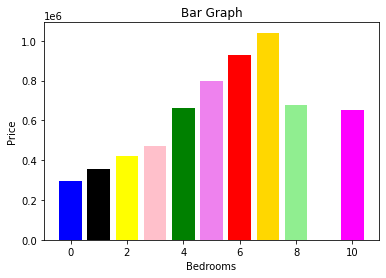

In [8]:
#3
bedroom_df=house[['bedrooms','price']].groupby(['bedrooms']).mean()
colours=['blue','black','yellow','pink','green','violet','red','gold','lightgreen','magenta']
plt.bar(bedroom_df.index,bedroom_df.price,color=colours)
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bar Graph')
plt.show()

Text(0.5, 1.0, 'Lat v Long:red waterfronts')

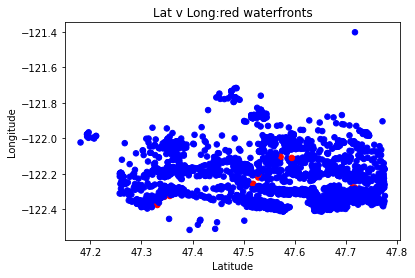

In [9]:
#4
colours={1:'red',0:'blue'}
plt.scatter('lat','long',data=house, s=30,c=house['waterfront'].map(colours))
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Lat v Long:red waterfronts')

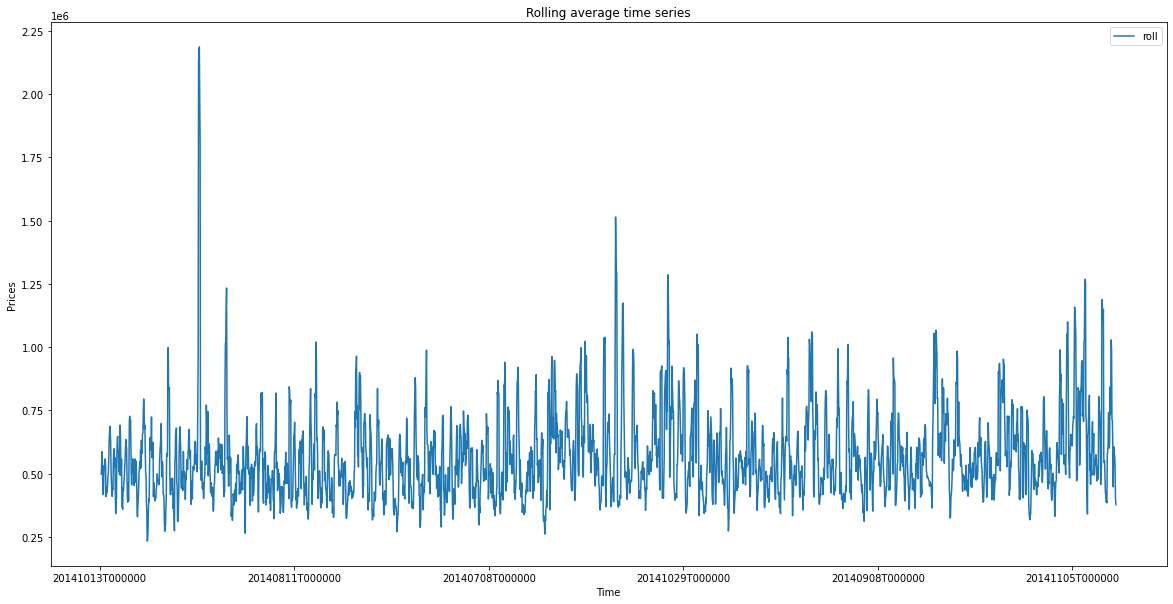

In [14]:
#5
df=pd.read_csv('kc_house_data_small.csv',index_col='date')
df['roll']=df['price'].rolling(5).mean()
df[['roll']].plot(figsize=(20,10))
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Rolling average time series')
plt.show()